<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

--- 
## Background
--- 

### Problem Statement

As some states require all students to take the SAT ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)) or ACT ([*source*](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)), administrators in these states argue that by making all students participate in testing could encourage some students who wouldn't otherwise take the test to maybe consider applying to college since they already have completed the testing requirements ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)).

However, research has shown correlations between family income levels and test scores including dramatic differences in scores between Black and White students of low family income levels ([*source*](https://www.researchgate.net/publication/280232788_Race_Poverty_and_SAT_Scores_Modeling_the_Influences_of_Family_Income_on_Black_and_White_High_School_Students%27_SAT_Performance)).

This project looks to determine if, more broadly, a state's median income correlates to SAT/ACT test scores.

Does a state’s median income correlate with the state’s average test score?


### Data

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State from General Assembly
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State from General Assembly
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State from General Assembly
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State from General Assembly
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State from General Assembly
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State from General Assembly
* [`Median_Household_Income_by_State.csv`](./data/Median_Household_Income_by_State.csve.csv): 2015-2019 American Community Survey 5-Year Estimates  ([*source*](https://www.census.gov/programs-surveys/acs/))

#### Import Libraries

In [3]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [4]:
# Import data
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')
sat_2017 = pd.read_csv('data/sat_2017.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')


#### ACT 2017

In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
# Check for missing values and data types
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [5]:
# Drop subject specific columns since they are not present in other datasets for 2018 and 2019
act_2017 = act_2017.drop(columns=['English','Math','Science','Reading'], axis=1)

In [6]:
# Change column names to include:
# lower case
# _2017 attached to name to prep for merge
act_2017 = act_2017.add_suffix('_2017') # State will have _2017 for now
act_2017 = act_2017.rename(columns={'State_2017': 'State', 
                                    'Participation_2017' : 'act_part_2017',
                                    'Composite_2017': 'act_avg_2017'})
act_2017.columns = act_2017.columns.str.lower()

In [7]:
# strip % from participation then convert into float
act_2017['act_part_2017'] = act_2017['act_part_2017'].str.rstrip('%')
act_2017['act_part_2017'] = pd.to_numeric(act_2017['act_part_2017'], errors='coerce')
act_2017['act_avg_2017'] = pd.to_numeric(act_2017['act_avg_2017'], errors='coerce')

In [8]:
# convert participation and composite columns to float
act_2017['act_part_2017'] = [float(pct) for pct in act_2017['act_part_2017']]
act_2017['act_avg_2017'] = [float(pct) for pct in act_2017['act_avg_2017']]
act_2017 = act_2017.replace([act_2017['act_avg_2017'][51]],20.2) # this value has an x in the original dataset, but can be replaced after

In [9]:
act_2017.head(2)

,state,act_part_2017,act_avg_2017
0,National,60.0,21.0
1,Alabama,100.0,19.2


In [10]:
# Remove National 2017 - only used in 2017, not 2018 or 2019
act_2017.drop(index = 0, inplace = True) #National

In [11]:
# Reset Index now that 0 is gone
act_2017.reset_index(drop=True, inplace=True)

In [12]:
act_2017.head(2)

,state,act_part_2017,act_avg_2017
0,Alabama,100.0,19.2
1,Alaska,65.0,19.8


Quick Summary ACT 2017 Dataset 
- 52 Entries for States (50 States + "National" + "District of Columbia"
- The National average should be used as a comparison to the other states, but not added in any cumulation analysis to avoid doubling values
- Compite column is renamed to act_avg_2017 to represent the average of the 4 topic scores
- Act scores are out of 1 - 36 for each section

#### ACT 2018

In [13]:
# Check for missing values and data types
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [14]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [15]:
# capitalize Columbia
act_2018 = act_2018.replace([act_2018['State'][8]],'District of Columbia')

# Maine is duplicated. Remove one and re-index
act_2018 = act_2018.drop(index=19) #Maine

# Reindex 
sat_2018.reset_index(drop=True, inplace=True)


In [16]:
# Change column names to include:
# lower case
# _2018 attached to name to prep for merge
act_2018 = act_2018.add_suffix('_2018') # State will have _2017 for now
act_2018 = act_2018.rename(columns={'State_2018': 'State', 
                                    'Participation_2018' : 'act_part_2018',
                                    'Composite_2018': 'act_avg_2018'})
act_2018.columns = act_2018.columns.str.lower()

In [17]:
# strip % from participation then convert into float
act_2018['act_part_2018'] = act_2018['act_part_2018'].str.rstrip('%')
act_2018['act_part_2018'] = pd.to_numeric(act_2018['act_part_2018'], errors='coerce')
act_2018['act_avg_2018'] = pd.to_numeric(act_2018['act_avg_2018'], errors='coerce')

In [18]:
act_2018['act_part_2018'] = [float(pct) for pct in act_2018['act_part_2018']]
act_2018['act_avg_2018'] = [float(pct) for pct in act_2018['act_avg_2018']]

In [19]:
act_2018.head(51)

,state,act_part_2018,act_avg_2018
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of Columbia,32.0,23.6
9,Florida,66.0,19.9


In [20]:
# participation is now a numeric value representing percentage
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   act_part_2018  51 non-null     float64
 2   act_avg_2018   51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


#### ACT 2019

In [21]:
# ACT 2019
act_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [22]:
# Check for missing values and data types
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [23]:
# drop national in line 52
act_2019 = act_2019.drop(index = 51)

In [24]:
# Change column names to include:
# lower case
# _2019 attached to name to prep for merge
act_2019 = act_2019.add_suffix('_2019') # State will have _2017 for now
act_2019 = act_2019.rename(columns={'State_2019': 'State', 
                                    'Participation_2019' : 'act_part_2019',
                                    'Composite_2019': 'act_avg_2019'})
act_2019.columns = act_2019.columns.str.lower()

In [25]:
act_2019.head(1)

,state,act_part_2019,act_avg_2019
0,Alabama,100%,18.9


In [26]:
# strip % from participation then convert into float
act_2019['act_part_2019'] = act_2019['act_part_2019'].str.rstrip('%')
act_2019['act_part_2019'] = pd.to_numeric(act_2019['act_part_2019'], errors='coerce')
act_2019['act_avg_2019'] = pd.to_numeric(act_2019['act_avg_2019'], errors='coerce')

In [27]:
act_2019['act_part_2019'] = [float(pct) for pct in act_2019['act_part_2019']]
act_2019['act_avg_2019'] = [float(pct) for pct in act_2019['act_avg_2019']]

In [28]:
act_2019.head(51)

,state,act_part_2019,act_avg_2019
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1
2,Arizona,73.0,19.0
3,Arkansas,100.0,19.3
4,California,23.0,22.6
5,Colorado,27.0,23.8
6,Connecticut,22.0,25.5
7,Delaware,13.0,24.1
8,District of Columbia,32.0,23.5
9,Florida,54.0,20.1


In [29]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   act_part_2019  51 non-null     float64
 2   act_avg_2019   51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


#### Merge ACT 2017, 2019, 2019

In [30]:
# Merge act data from all years
act_all = pd.merge(act_2017, act_2018, how='left')
act_all = pd.merge(act_all, act_2019, how='left')

In [31]:
act_all.head(5)

,state,act_part_2017,act_avg_2017,act_part_2018,act_avg_2018,act_part_2019,act_avg_2019
0,Alabama,100.0,19.2,100.0,19.1,100.0,18.9
1,Alaska,65.0,19.8,33.0,20.8,38.0,20.1
2,Arizona,62.0,19.7,66.0,19.2,73.0,19.0
3,Arkansas,100.0,19.4,100.0,19.4,100.0,19.3
4,California,31.0,22.8,27.0,22.7,23.0,22.6


In [32]:
# change composite to percentage
act_all['act_avg_2017'] = 100 * act_all['act_avg_2017'] / 36

In [33]:
act_all['act_avg_2018'] = 100 * act_all['act_avg_2018'] / 36

In [34]:
act_all['act_avg_2019'] = 100 * act_all['act_avg_2019'] / 36

In [121]:
act_all.head(30)

,state,act_part_2017,act_avg_2017,act_part_2018,act_avg_2018,act_part_2019,act_avg_2019
0,Alabama,100.0,53.333333,100.0,53.055556,100.0,52.500000
1,Alaska,65.0,55.000000,33.0,57.777778,38.0,55.833333
2,Arizona,62.0,54.722222,66.0,53.333333,73.0,52.777778
3,Arkansas,100.0,53.888889,100.0,53.888889,100.0,53.611111
4,California,31.0,63.333333,27.0,63.055556,23.0,62.777778
5,Colorado,100.0,57.777778,30.0,66.388889,27.0,66.111111
6,Connecticut,31.0,70.000000,26.0,71.111111,22.0,70.833333
7,Delaware,18.0,66.944444,17.0,66.111111,13.0,66.944444
8,District of Columbia,32.0,67.222222,32.0,65.555556,32.0,65.277778
9,Florida,73.0,55.000000,66.0,55.277778,54.0,55.833333


In [36]:
# save to data file
act_all.to_csv('data/act_all.csv')

## SAT 2017, 2018, 2019

#### SAT 2017

In [37]:
# SAT 2017
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [38]:
# Check for missing values and data types
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


"National" not included in this data set as it was in ACT

In [39]:
# Change column names to include:
# lower case
# _2017 attached to name to prep for merge
sat_2017 = sat_2017.rename(columns={'State': 'State', 
                                    'Participation' : 'sat_part_2017',
                                    'Total': 'sat_avg_2017'})
sat_2017.columns = sat_2017.columns.str.lower()


In [40]:
# strip % from participation then convert into float
sat_2017['sat_part_2017'] = sat_2017['sat_part_2017'].str.rstrip('%')
sat_2017['sat_part_2017'] = pd.to_numeric(sat_2017['sat_part_2017'], errors='coerce')

In [41]:
sat_2017['sat_part_2017'] = [float(pct) for pct in sat_2017['sat_part_2017']]

In [42]:
# drop section reading scores
sat_2017 = sat_2017.drop(columns=["evidence-based reading and writing", 'math'])

In [43]:
sat_2017.head(2)

,state,sat_part_2017,sat_avg_2017
0,Alabama,5.0,1165
1,Alaska,38.0,1080


#### SAT 2018

In [44]:
# SAT 2018
sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [45]:
# Check for missing values and data types
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [46]:
# Change column names to include:
# lower case
# _2018 attached to name to prep for merge
sat_2018 = sat_2018.rename(columns={'State': 'State', 
                                    'Participation' : 'sat_part_2018',
                                    'Total': 'sat_avg_2018'})
sat_2018.columns = sat_2018.columns.str.lower()

# strip % from participation then convert into float
sat_2018['sat_part_2018'] = sat_2018['sat_part_2018'].str.rstrip('%')
sat_2018['sat_part_2018'] = pd.to_numeric(sat_2018['sat_part_2018'], errors='coerce')

In [47]:
sat_2018['sat_part_2018'] = [float(pct) for pct in sat_2018['sat_part_2018']]

In [48]:
# drop section reading scores
sat_2018 = sat_2018.drop(columns=["evidence-based reading and writing", 'math'])

In [49]:
sat_2018.head(2)

,state,sat_part_2018,sat_avg_2018
0,Alabama,6.0,1166
1,Alaska,43.0,1106


#### SAT 2019

In [50]:
# SAT 2019
sat_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [51]:
# Check for missing values and data types
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [52]:
# Check why there are 53 entries for 50+1 States --> Puerto Rico, Virgin Islands
sat_2019['State']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [53]:
# Delete rows for Virgin Islands and Puerto Rico to be consistent with other 
sat_2019.drop(index = 39, inplace = True) #PR
sat_2019.drop(index = 47, inplace = True) #VI


In [54]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [55]:
# Change column names to include:
# lower case
# _2019 attached to name to prep for merge
sat_2019 = sat_2019.rename(columns={'State': 'State', 
                                    'Participation Rate' : 'sat_part_2019',
                                    'Total': 'sat_avg_2019'})
sat_2019.columns = sat_2019.columns.str.lower()

# strip % from participation then convert into float
sat_2019['sat_part_2019'] = sat_2019['sat_part_2019'].str.rstrip('%')
sat_2019['sat_part_2019'] = pd.to_numeric(sat_2019['sat_part_2019'], errors='coerce')

In [56]:
# drop section reading scores
sat_2019 = sat_2019.drop(columns=["ebrw", 'math'])

In [57]:
# Index reset
sat_2019.reset_index(drop=True, inplace=True)

In [58]:
# Participation to float
sat_2019['sat_part_2019'] = [float(pct) for pct in sat_2019['sat_part_2019']]

In [59]:
sat_2019.head(2)

,state,sat_part_2019,sat_avg_2019
0,Alabama,7.0,1143
1,Alaska,41.0,1097


## Combine SAT 2017, 2018, 2019

In [60]:
sat_all = pd.merge(sat_2017, sat_2018, how='left')
sat_all = pd.merge(sat_all, sat_2019, how='left')

In [61]:
sat_all

,state,sat_part_2017,sat_avg_2017,sat_part_2018,sat_avg_2018,sat_part_2019,sat_avg_2019
0,Alabama,5.0,1165,6.0,1166,7.0,1143
1,Alaska,38.0,1080,43.0,1106,41.0,1097
2,Arizona,30.0,1116,29.0,1149,31.0,1134
3,Arkansas,3.0,1208,5.0,1169,6.0,1141
4,California,53.0,1055,60.0,1076,63.0,1065
5,Colorado,11.0,1201,100.0,1025,100.0,1024
6,Connecticut,100.0,1041,100.0,1053,100.0,1046
7,Delaware,100.0,996,100.0,998,100.0,985
8,District of Columbia,100.0,950,92.0,977,94.0,975
9,Florida,83.0,1017,56.0,1099,100.0,999


In [62]:
sat_all.dtypes

state             object
sat_part_2017    float64
sat_avg_2017       int64
sat_part_2018    float64
sat_avg_2018       int64
sat_part_2019    float64
sat_avg_2019       int64
dtype: object

In [63]:
# check maximum and minimum combination numbers. 400 min and 1600 max
sat_all.describe()

,sat_part_2017,sat_avg_2017,sat_part_2018,sat_avg_2018,sat_part_2019,sat_avg_2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,1126.098039,45.745098,1120.019608,49.058824,1113.078431
std,35.276632,92.494812,37.314256,94.155083,38.747600,97.197910
min,2.000000,950.000000,2.000000,977.000000,2.000000,943.000000
25%,4.000000,1055.500000,4.500000,1057.500000,5.500000,1038.000000
50%,38.000000,1107.000000,52.000000,1098.000000,54.000000,1097.000000
75%,66.000000,1212.000000,77.500000,1204.000000,82.000000,1210.000000
max,100.000000,1295.000000,100.000000,1298.000000,100.000000,1284.000000


In [64]:
sat_all['sat_avg_2017'] =  100 * sat_all['sat_avg_2017'] / 1600

In [65]:
sat_all['sat_avg_2018'] =  100 * sat_all['sat_avg_2018'] / 1600

In [66]:
sat_all['sat_avg_2019'] = 100 * sat_all['sat_avg_2019'] / 1600

In [67]:
sat_all.head(2)

,state,sat_part_2017,sat_avg_2017,sat_part_2018,sat_avg_2018,sat_part_2019,sat_avg_2019
0,Alabama,5.0,72.8125,6.0,72.875,7.0,71.4375
1,Alaska,38.0,67.5000,43.0,69.125,41.0,68.5625


In [68]:
sat_all.to_csv('data/sat_all.csv')

#### Import Median Income Data from Census

In [69]:
income = pd.read_csv('data/Median_Household_Income_by_State.csv')

In [70]:
income.head(2)

,Median Household Income by State,Unnamed: 1,Unnamed: 2
0,State,Income,Margin Of Error
1,Alabama,"$50,536",+/- $304


In [71]:
# Rename columns
income.rename(columns={'Unnamed: 1': 'income', 'Unnamed: 2': 'error',
                      'Median Household Income by State': 'state'}, inplace=True)

In [72]:
# Drop first row that includes title data
income.drop([0], inplace=True)

In [73]:
# Reset index
income.reset_index(drop=True, inplace=True)

In [74]:
# Drop last two rows, includes info line and puerto rico which can be dropped since not includeded in score data
income.drop([51,52], inplace=True)

In [75]:
income.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   income  51 non-null     object
 2   error   51 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [76]:
income.head(2)

,state,income,error
0,Alabama,"$50,536",+/- $304
1,Alaska,"$77,640","+/- $1,015"


In [77]:
#Convert income from object to float
income['income'] = income['income'].str.strip('$')
income['income'] = income['income'].str.replace(',', '').astype(float)

In [78]:
# save to file
income.to_csv('data/income.csv')

### Combine SAT and ACT for 3 year average to compare with income

In [79]:
# Combine State, ACT average, SAT average and income into one dataframe
test_income_df = pd.DataFrame(act_all['state'], columns=['state'])

In [80]:
# Calculate ACT average percentage over 3 years for each state
test_income_df['act_avg'] = (act_all['act_avg_2017'] + 
                             act_all['act_avg_2018'] + 
                             act_all['act_avg_2019']) / 3

In [81]:
# Calculate SAT average percentage over 3 years for each state
test_income_df['sat_avg'] = (sat_all['sat_avg_2017'] + 
                           sat_all['sat_avg_2018'] + 
                           sat_all['sat_avg_2019']) / 3

In [82]:
# Add income column to df
test_income_df['med_income'] = income['income']

In [83]:
# Double check data types
test_income_df.dtypes

state          object
act_avg       float64
sat_avg       float64
med_income    float64
dtype: object

In [84]:
# Add average participation ACT
test_income_df['act_part_avg'] = (act_all['act_part_2017'] + 
                             act_all['act_part_2018'] + 
                             act_all['act_part_2019']) / 3

In [85]:
# Add average participation SAT
test_income_df['sat_part_avg'] = (sat_all['sat_part_2017'] + 
                             sat_all['sat_part_2018'] + 
                             sat_all['sat_part_2019']) / 3

In [86]:
test_income_df

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
0,Alabama,52.962963,72.375000,50536.0,100.000000,6.000000
1,Alaska,56.203704,68.395833,77640.0,45.333333,40.666667
2,Arizona,53.611111,70.812500,58945.0,67.000000,30.000000
3,Arkansas,53.796296,73.291667,47597.0,100.000000,4.666667
4,California,63.055556,66.583333,75235.0,27.000000,58.666667
5,Colorado,63.425926,67.708333,72331.0,52.333333,70.333333
6,Connecticut,70.648148,65.416667,78444.0,26.333333,100.000000
7,Delaware,66.666667,62.062500,68287.0,16.000000,100.000000
8,District of Columbia,66.018519,60.458333,86420.0,32.000000,95.333333
9,Florida,55.370370,64.895833,55660.0,64.333333,79.666667


**Save DataFrame to CSV**

In [87]:
test_income_df.to_csv('data/test_income_df.csv')

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The name of each state including District of Columbia|
|act_avg|float|ACT|Average ACT score percentage per state|
|sat_avg|float|SAT|Average SAT score percentage per state|
|act_part_avg|float|ACT|Average ACT score percentage per state|
|sat_part_avg|float|SAT|Average SAT score percentage per state|
|med_income|float|2015-2019 American Community Survey 5-Year Estimates|Median income per state|


## Exploratory Data Analysis

In [1]:
# Open ACT and SAT Data Tables

In [4]:
test_income_df = pd.read_csv('data/test_income_df.csv')

In [90]:
test_income_df.head(3)

,Unnamed: 0,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
0,0,Alabama,52.962963,72.375000,50536.0,100.000000,6.000000
1,1,Alaska,56.203704,68.395833,77640.0,45.333333,40.666667
2,2,Arizona,53.611111,70.812500,58945.0,67.000000,30.000000


In [94]:
test_income_df.drop(columns='Unnamed: 0',inplace=True)

In [95]:
test_income_df.head(2)

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
0,Alabama,52.962963,72.375000,50536.0,100.000000,6.000000
1,Alaska,56.203704,68.395833,77640.0,45.333333,40.666667


#### Test Summary

In [96]:
test_income_df.describe()

,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,59.704067,69.983252,63097.862745,61.882353,44.869281
std,5.772583,5.685923,10715.134497,32.869832,35.752860
min,49.444444,60.458333,45081.000000,7.000000,2.000000
25%,55.462963,66.000000,55560.500000,28.000000,4.500000
50%,59.444444,68.395833,61439.000000,64.333333,50.666667
75%,65.000000,75.010417,71463.500000,99.000000,72.666667
max,70.740741,80.770833,86420.000000,100.000000,100.000000


In [105]:
# States with the highest SAT Scores
test_income_df[test_income_df['sat_avg']>80]

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
23,Minnesota,59.444444,80.770833,71306.0,98.0,3.666667
49,Wisconsin,56.759259,80.583333,61747.0,100.0,3.000000


In [100]:
# States with the highest ACT Scores
test_income_df[test_income_df['act_avg']>70]

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
6,Connecticut,70.648148,65.416667,78444.0,26.333333,100.0
21,Massachusetts,70.740741,69.833333,81215.0,25.000000,79.0


In [103]:
# States with the lowest SAT Scores
test_income_df[test_income_df['sat_avg']<61]

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
8,District of Columbia,66.018519,60.458333,86420.0,32.0,95.333333


In [106]:
# States with the lowest ACT Scores
test_income_df[test_income_df['act_avg']<50]

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
28,Nevada,49.444444,71.083333,60365.0,100.0,23.0


##### Insights

The following are insights of the average SAT and ACT test scores, participation and income 2017 to 2019:

###### General Participation
- ACT participation (62%) is higher than SAT (45%)
- ACT has a lower average score (60%) than SAT (70%)
- Minnesota (80.8%) and Wisconsin (80.6%)have the highest average SAT scores
- Connecticut (70.6%) and Massachusetts (70.7%) have the highest average ACT scores
- DC (60.5%) has the lowest avg SAT scores
- Nevada (49.4%) has the lowest avg ACT scores

## Visualize the Data

**Sort ACT scores by 2017 values**

In [115]:
act_part_sort = test_income_df.sort_values(by=['act_part_avg'], inplace=False, ascending=False)
act_part_sort

,state,act_avg,sat_avg,med_income,act_part_avg,sat_part_avg
0,Alabama,52.962963,72.375000,50536.0,100.000000,6.000000
17,Kentucky,55.555556,77.645833,50589.0,100.000000,4.000000
49,Wisconsin,56.759259,80.583333,61747.0,100.000000,3.000000
44,Utah,56.481481,72.458333,71621.0,100.000000,3.666667
42,Tennessee,54.444444,76.645833,53320.0,100.000000,6.000000
36,Oklahoma,53.333333,64.000000,52919.0,100.000000,12.333333
33,North Carolina,52.962963,68.312500,54602.0,100.000000,50.666667
28,Nevada,49.444444,71.083333,60365.0,100.000000,23.000000
26,Montana,55.648148,74.854167,54970.0,100.000000,9.666667
24,Mississippi,51.481481,77.395833,45081.0,100.000000,2.666667


### Plot participation for each state by ACT participation. 
To keep state location the same on each bar plot, SAT participation will be ordered based on ACT order

Text(0.5, 1.0, 'ACT Average Participation by State 2017 - 2019')

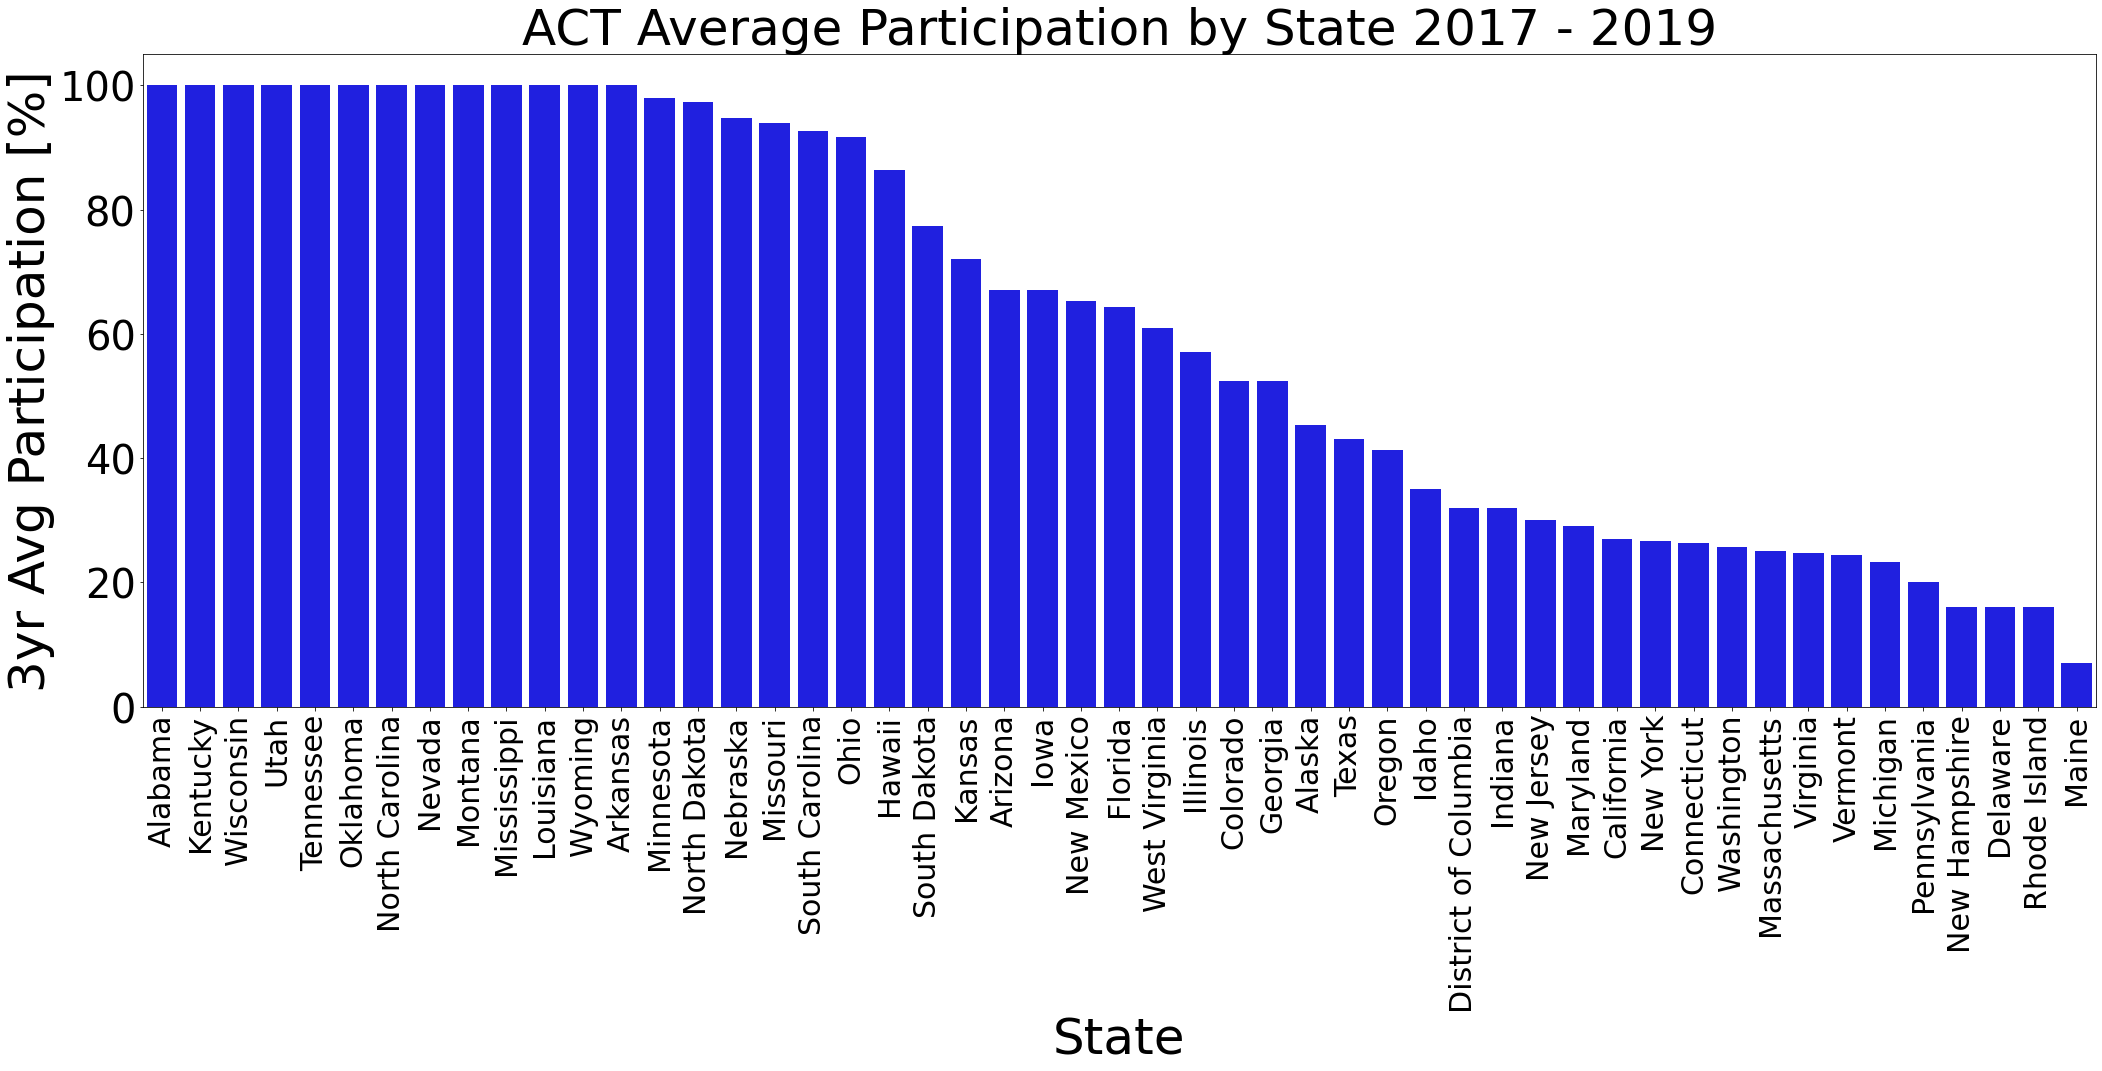

In [116]:
# Plot ACT average participation by highest to lowest state participation
plt.subplots(figsize=(35,12))
width =0.3
s1 = sns.barplot(x = 'state', y = 'act_part_avg', data = act_part_sort, color = 'blue')
#s2 = sns.barplot(x = 'state', y = 'sat_part_avg', data = sat_sort, color = 'orange')
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=40)
plt.xlabel('State',fontsize=50)
plt.ylabel('3yr Avg Participation [%]',fontsize=50)
plt.title('ACT Average Participation by State 2017 - 2019',fontsize=50)
#plt.xticks(rotation=90);

Text(0.5, 1.0, 'SAT Average Participation by State 2017 - 2019 (Ordered by ACT Partic.)')

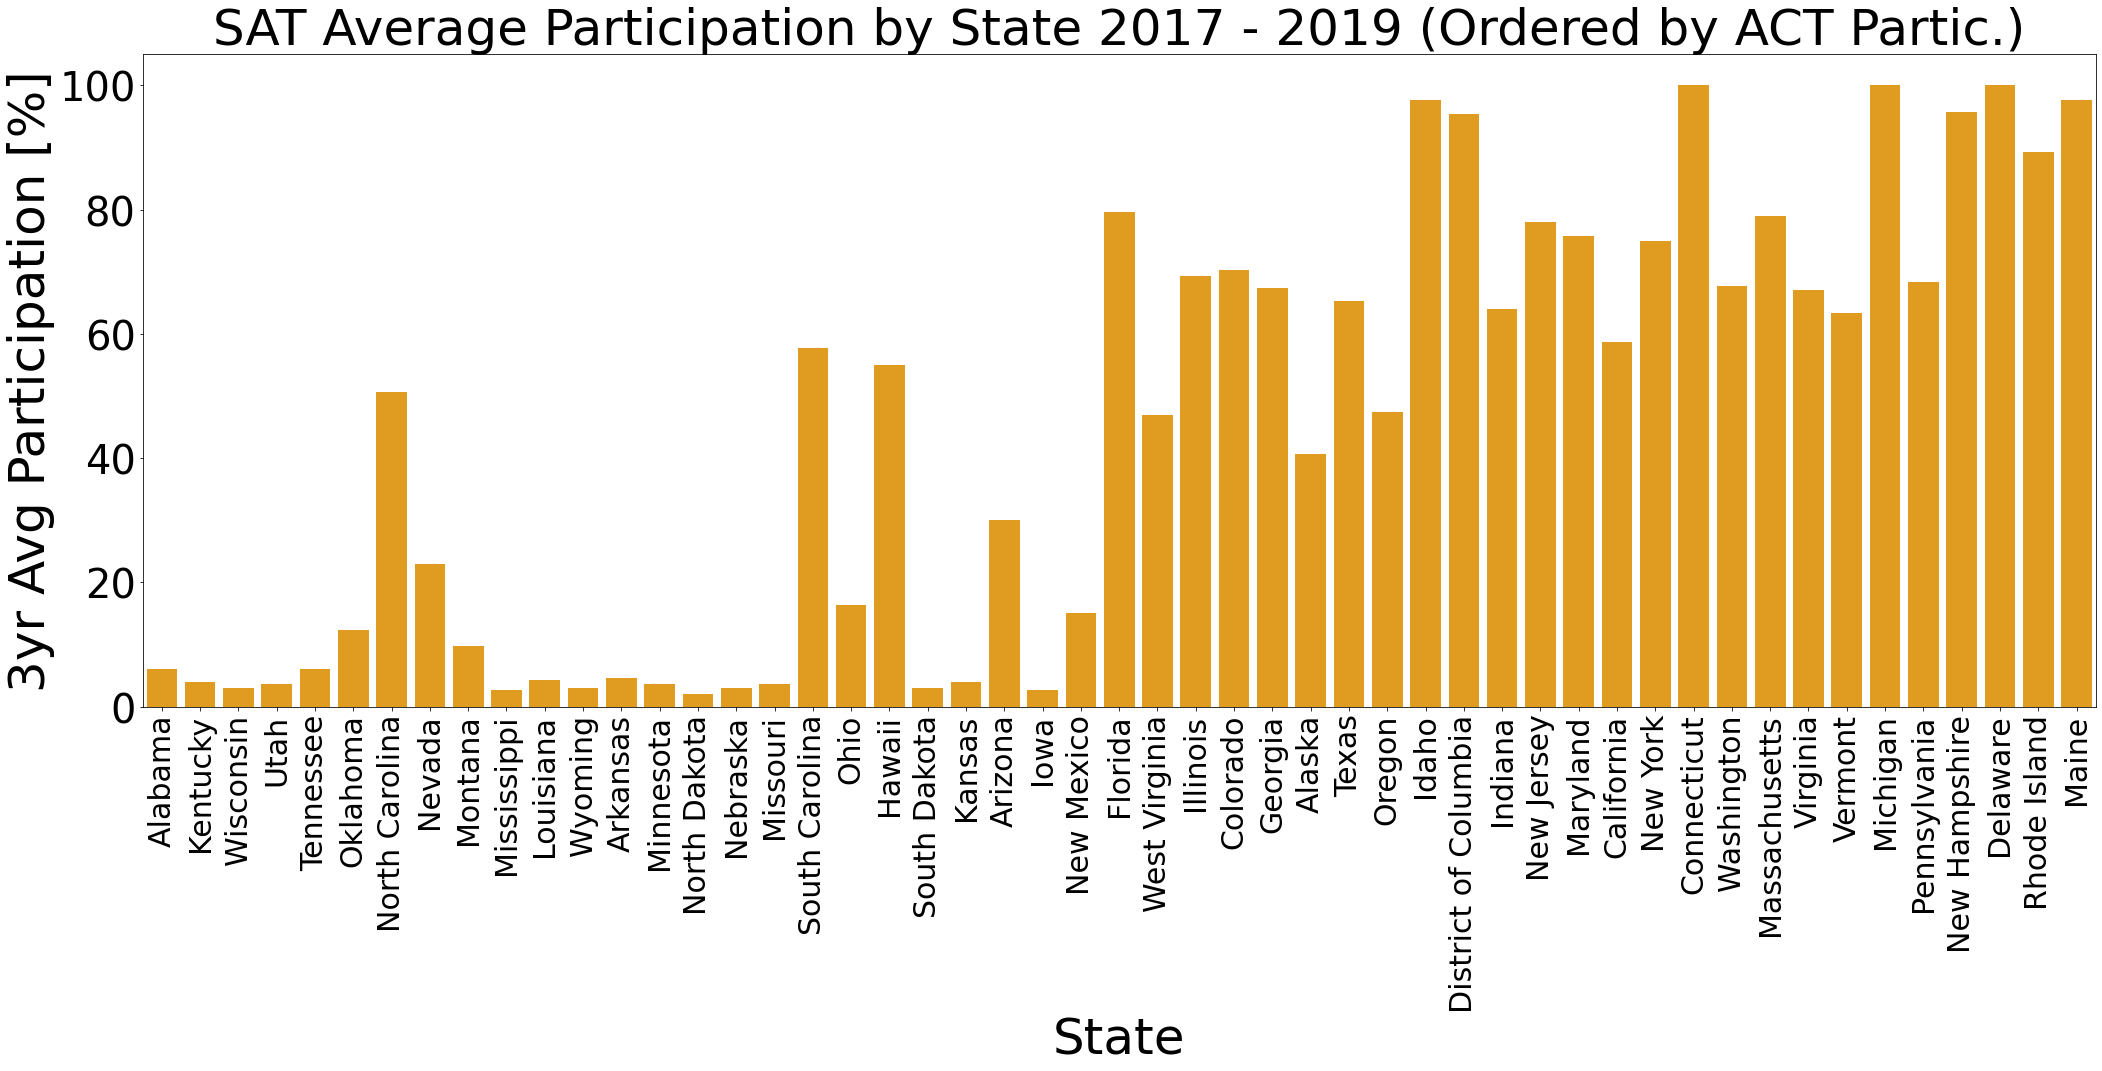

In [118]:
# Plot SAT participation based on ACT participation order

plt.subplots(figsize=(35,12))
width =0.3
#s1 = sns.barplot(x = 'state', y = 'act_part_avg', data = act_sort, color = 'blue')
s2 = sns.barplot(x = 'state', y = 'sat_part_avg', data = act_part_sort, color = 'orange')
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=40)
plt.xlabel('State',fontsize=50)
plt.ylabel('3yr Avg Participation [%]',fontsize=50)
plt.title('SAT Average Participation by State 2017 - 2019 (Ordered by ACT Partic.)',fontsize=50)


Text(0.5, 1.0, 'Avg Income 2015 - 2019 (Ordered by ACT Partic.)')

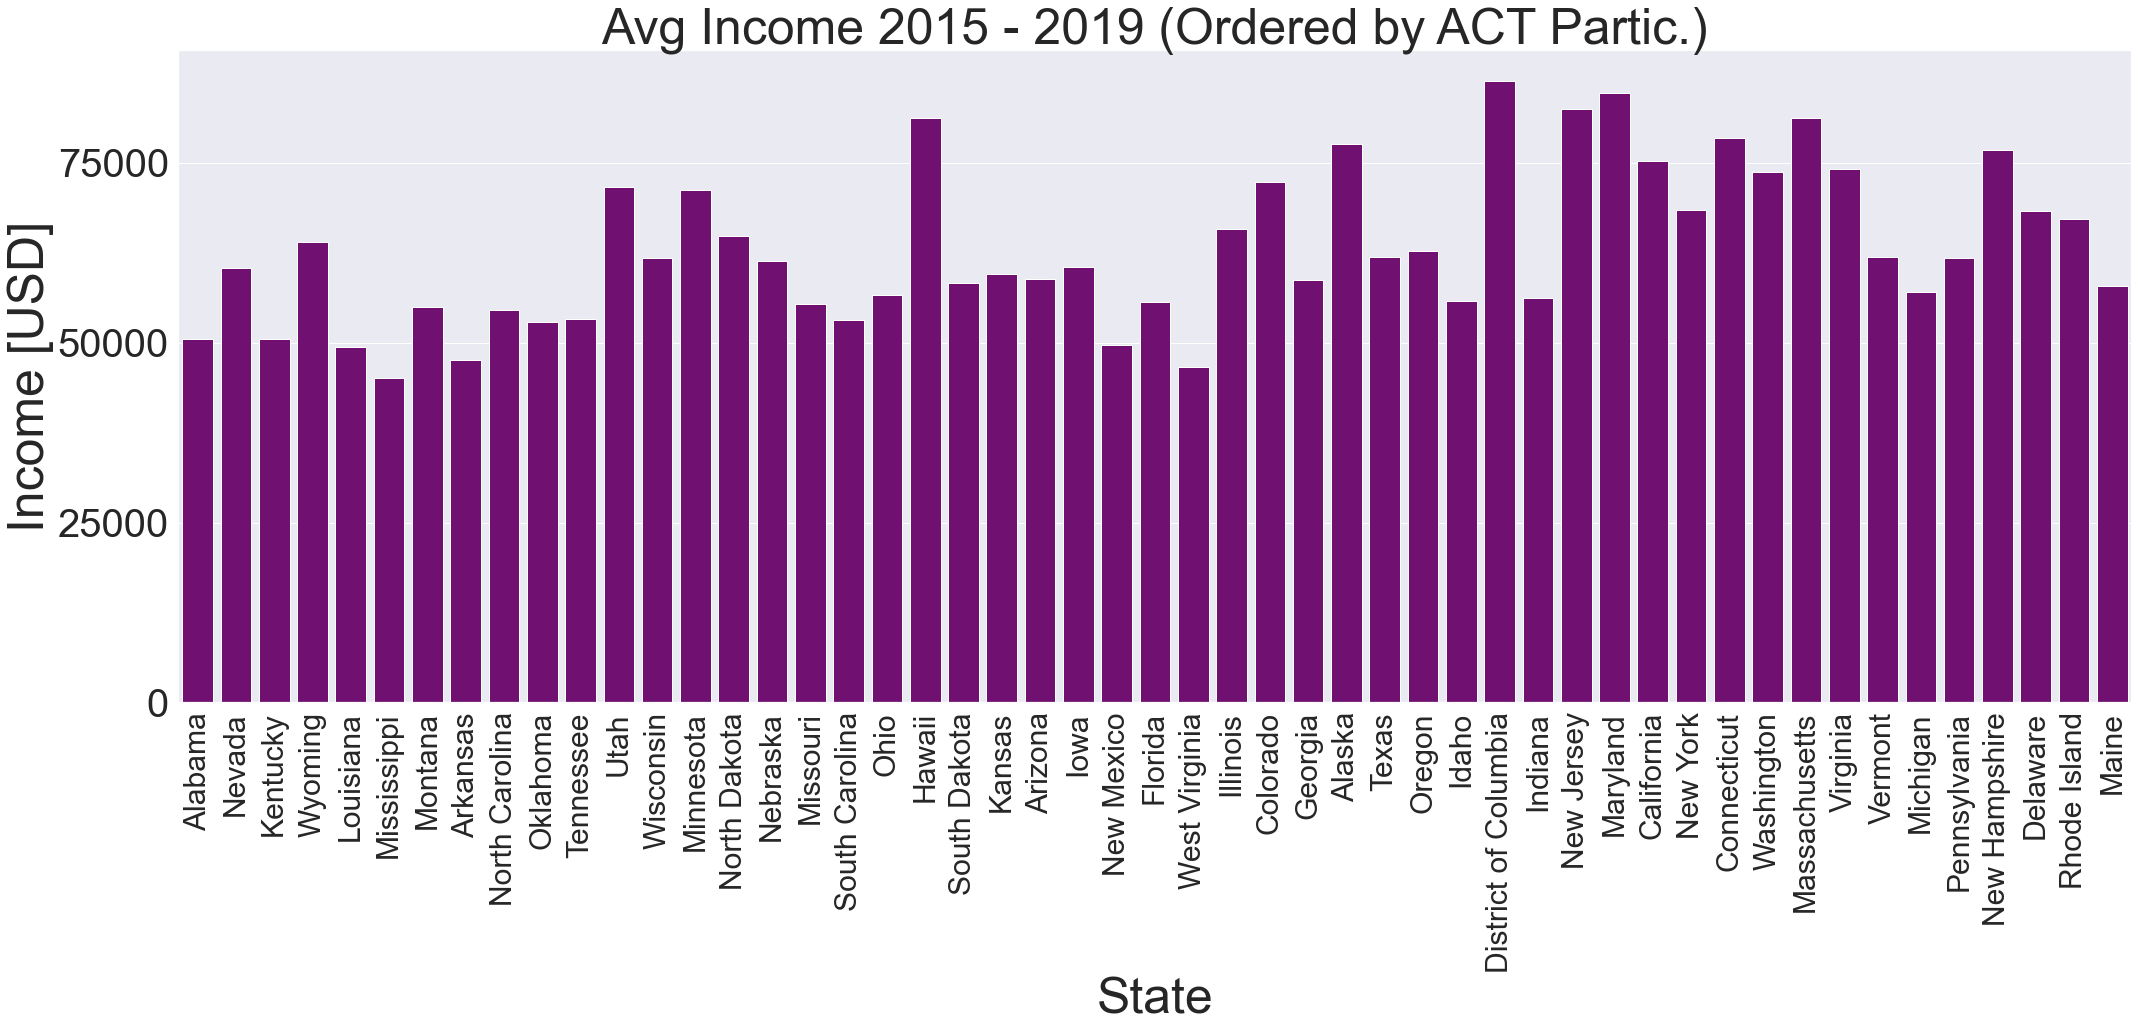

In [603]:
# Plot avg income of each state based on order 
plt.subplots(figsize=(35,12))
width =0.3
#s1 = sns.barplot(x = 'state', y = 'act_part_avg', data = act_sort, color = 'blue')
s2 = sns.barplot(x = 'state', y = 'med_income', data = act_part_sort, color = 'purple')
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=40)
plt.xlabel('State',fontsize=50)
plt.ylabel('Income [USD]',fontsize=50)
plt.title('Avg Income 2015 - 2019 (Ordered by ACT Partic.)',fontsize=50)
#plt.xticks(rotation=90)

#### Participation Insights
States with 100% participation have mandatory testing requirements for their state. Since the participation rate above are based on a 3 year average, some states above have either implemented mandatory testing in 1 or 2 of the three years addressed in this study, or the state was not able to achieve 100% participation one year. For example, the Nebraska ACT participation at 94% includes 2 years of 100% participation and one year of 93% in 2017. ACT testing became mandatory in 2017 ([*source*](https://www.education.ne.gov/assessment/act/) and it took the state one additional year to reach 100% participation.

Observing ACT and SAT participation barplots, it is shown that states with high participation in one test type likely see low participation in the other, particulatly for states that make one of the tests mandatory. 

Overall, ACT tests see a higher rate of participation.

The income plot shows some indication for the states on the left side of the plot that more lower income states have higher ACT participation and some states with higher incomes have greater SAT participation. However, it is difficult to observe correlation of participation and income just based on the barplots above. 

The next step will be to explore the correlation between score, participation and income based on state data.

### Score-Participation-Income Correlation

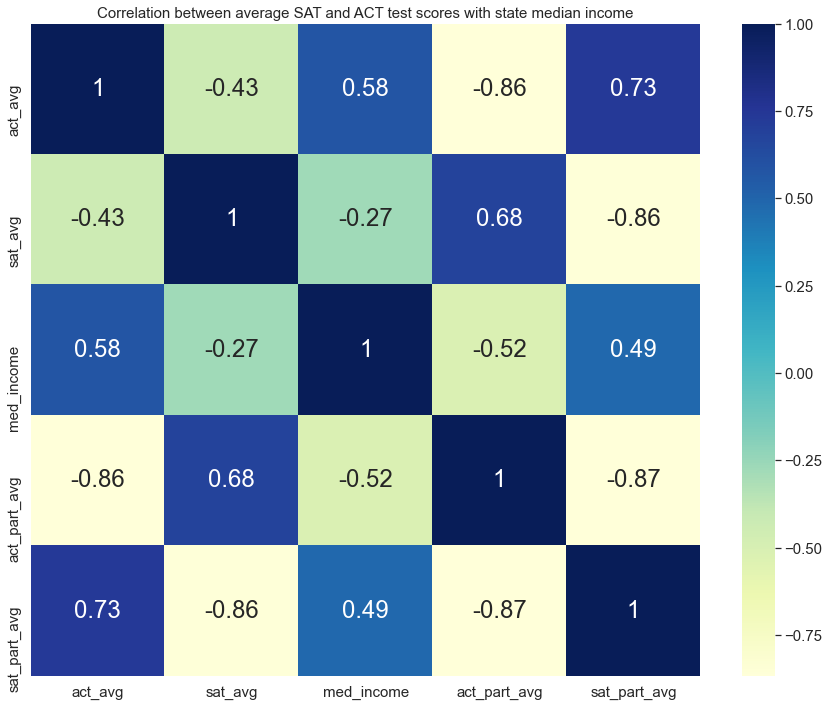

In [194]:
# Create a correlation matrix for the test-income dataset
plt.figure(figsize=(15,12))
plt.rc('axes', titlesize=15) #controls default text size
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend
plt.title('Correlation between average SAT and ACT test scores with state median income')
sns.heatmap(test_income_df.corr(), annot=True, cmap="YlGnBu")
#sns.set(font_scale = 2)

#### Correlation Insights
The ACT has a negative correlation between participation and income (-0.52). That is, the higher the participation the lower the med-income of the state. This is likely due to the mandatory participation on the ACT of the states with a lower median income. Conversely, ACT scores correlate with median income (0.58), so as median income increases for a state, so does the likelihood of high scoring ACT tests.

Interestingly, the SAT participation has the opposite correlations to the ACT. The SAT has a positive correlation (0.49) with median income, but a negative correlation with scores (-27). That is the higher the median income of the state the greater the SAT participation rate but a lower overall average score is achieved by that state.

### Scatter Plots - Linear Trends

Text(0.5, 1.0, 'Comparing State Income by ACT Scores')

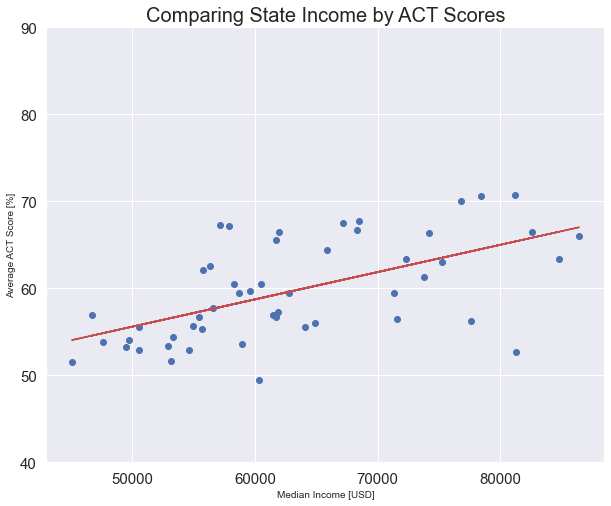

In [153]:
# Scatter plot ACT Score vs Income
plt.subplots(figsize=(10,8))
plt.rc('axes', titlesize=20) #controls default text size
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend
x=test_income_df['med_income']
y=test_income_df['act_avg']
plt.scatter(x=x,y=y);

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.ylim(40, 90)

plt.xlabel('Median Income [USD]')
plt.ylabel('Average ACT Score [%]')
plt.title('Comparing State Income by ACT Scores')

Text(0.5, 1.0, 'Comparing State Income by SAT Scores')

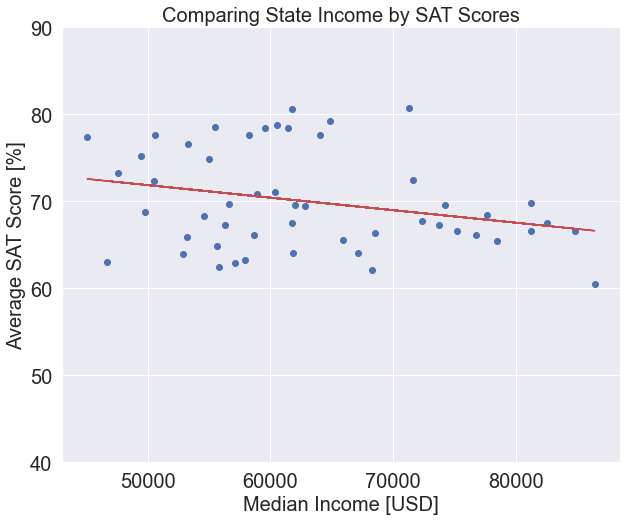

In [156]:
# Scatter plots - SAT vs Income
plt.subplots(figsize=(10,8))
plt.rc('font', size=2) #controls default text size
x=test_income_df['med_income']
y=test_income_df['sat_avg']
plt.scatter(x=x,y=y);

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.ylim(40, 90)

plt.xlabel('Median Income [USD]')
plt.ylabel('Average SAT Score [%]')
plt.title('Comparing State Income by SAT Scores')

#### Regression insights
(Note: there was a coefficient error with my original dataset so in my presentation SAT scores showed lower overall than ACT. The opposite is true.)

Overall, SAT scores were highest than ACT scores, but there is a stronger correlation between ACT and income (0.58). Recall that ACT also has higher participation overall over students taking the SAT and more states make the ACT mandatory for students. Also more states of lower median income make the ACT mandatory. So the greater participation of students of all income levels reduces the overall ACT score and with more participation in the standarized test, the greater the disparity between income and good grades. 

The SAT vs Income plot has an inverse correlation between income and SAT scores, but not as strong as ACT correlation. Having an inverse correlation of SAT test scores can be analyzed further by comparing the SAT participation barplot (ordered by ACT participation), the income barplot (ordered by ACT participation), and the SAT score vs Median Income linear trend. More lower income states required ACT testing instead of SAT testing as observed in the SAT participation barplot and the income barplots, and higher income states had greater SAT participation rates. Therefore, we see a more dramatic effect on how higher participation rates lower the overall average of the state's SAT score; Hence why there is an inverse correlation between state income and SAT scores. The lower income states had lower participation and yielded a higher average score.

Doing multivariate linear regression would be a better prediction tool to compare participation and scores to a state's income.



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

#### Conclusions

Data Science Question: Does a state’s median income correlate with the state’s average test score?

Even when comparing broad score and income averages per state versus comparing income and scores of individual students, there is still a correlation between income and test scores, particularly when participation is high among a larger range of income levels. Once participation levels become lower, the overall test scores become higher. This could be attributed to an increase of students participating who would not otherwise want to do the test and get lower scores. As shown when participation is high across a range of income levels, such as with the ACT scores versus median income, amongst those states there is a positive correlation between income and scores.

#### Recommendations for future studies

In the wake of the COVID-19 pandemic, many college's are dropping standarized testing requirements for admissions in 2021 and some colleges will even drop testing requirements up until 2025. With the increase in study's highlighting how financial inequities influence the score outcomes and not necessarily the student's post-secondary success, there is opportunity to now study student success in post-secondary academics when there is less admission weight on standardized testing.

However, with continued income inequality, it is still important to provide more funding and resources to in-need communities through the form of direct funding to schools or subsidized tutoring for lower income families.

Colleges can also put greater admissions weight towards a student’s GPA over test scores.
